In [350]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder, StandardScaler, PolynomialFeatures, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import model_selection
from sklearn.svm import SVR
from sklearn.svm import SVC
import plotly.express as px


from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

# Split

In [351]:
df = pd.read_csv("clean_data.csv")
df = df.iloc[: , 1:]
df

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,8467.0,779.0,17,340,2006.0,3,0,4,1.3,200000.0,3,1,1,1,1,2
1,3607.0,862.0,13,329,2011.0,4,1,2,2.5,168966.0,0,0,1,0,14,0
2,39493.0,891.0,18,655,2016.0,4,1,1,2.0,160931.0,0,1,1,0,14,4
3,1803.0,761.0,44,595,2010.0,3,1,2,1.8,258909.0,0,1,1,0,14,12
4,549.0,751.0,18,672,2013.0,8,1,4,2.4,216118.0,0,1,1,0,7,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8396,470.0,645.0,44,595,2011.0,3,1,2,1.8,307325.0,0,1,1,0,12,12
8397,8467.0,779.0,28,174,1999.0,1,1,0,2.0,300000.0,1,2,0,0,12,5
8398,15681.0,831.0,18,672,2011.0,8,1,4,2.4,161600.0,2,1,1,0,11,8
8399,26108.0,836.0,18,745,2010.0,4,1,1,2.0,116365.0,0,1,1,0,7,4


In [352]:
y = df.iloc[:, 0:1]
x = df.drop(['Price'], axis=1)
x = MinMaxScaler().fit_transform(x)
y

,Price
0,8467.0
1,3607.0
2,39493.0
3,1803.0
4,549.0
...,...
8396,470.0
8397,8467.0
8398,15681.0
8399,26108.0


In [353]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=5)

In [354]:
x_train

array([[0.83766234, 0.12244898, 0.25997582, ..., 0.        , 0.93333333,
        0.25      ],
       [0.14069264, 0.36734694, 0.81257557, ..., 0.        , 0.8       ,
        0.25      ],
       [0.44372294, 0.34693878, 0.41112455, ..., 1.        , 0.8       ,
        0.25      ],
       ...,
       [0.28787879, 0.36734694, 0.81257557, ..., 0.        , 0.8       ,
        0.25      ],
       [0.35497835, 0.12244898, 0.32406288, ..., 0.        , 0.8       ,
        0.75      ],
       [0.41341991, 0.36734694, 0.81257557, ..., 0.        , 0.8       ,
        0.25      ]])

In [355]:
y_train

,Price
4402,9722.0
1804,10036.0
5324,12231.0
2335,15053.0
2400,11447.0
...,...
7286,25889.0
3046,44047.0
4079,7056.0
2254,15994.0


## Linear Regression

In [356]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
r2 = r2_score(y_test,y_pred)
# mse = mean_squared_error(y_test,y_pred)
print(r2)

0.3393553425485971


# KFold SVR ⛔

In [357]:
# Num_fold = 3
# Seed = 45

In [358]:
# kfold = model_selection.KFold(n_splits=Num_fold, shuffle = True, random_state=Seed)
# Model_LM = LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
# c_val = 100
# svr_lin = SVR(kernel='linear', C=c_val)
# svr_rbf = SVR(kernel='rbf', C=c_val, gamma=0.01)
# svr_poly = SVR(kernel='poly', C=c_val, degree=2)

# score_LM = model_selection.cross_val_score(Model_LM, x_train, y_train, cv=kfold)
# score_lin = model_selection.cross_val_score(svr_lin, x_train, y_train, cv=kfold)
# score_rbf = model_selection.cross_val_score(svr_rbf, x_train, y_train, cv=kfold)
# score_poly = model_selection.cross_val_score(svr_poly, x_train, y_train, cv=kfold)

In [359]:
# # View score k-fold
# # Valication score comparison
# score = pd.DataFrame({'Linear Model':score_LM,'SVR_linear':score_lin, 'SVR_rbf': score_rbf, 'SVR_poly':score_poly})
# score_mean = pd.DataFrame({'AVG Linear Model':[score_LM.mean()],'AVG SVR_linear':[score_lin.mean()],'AVG SVR_rbf': [score_rbf.mean()], 'AVG SVC_poly': [score_poly.mean()]})

In [360]:
# score

In [361]:
# score_mean

# KNN

In [362]:
k = [1,3,5,7,9,11,13,19,25,35]


In [363]:
rating_pctile = np.percentile(y, [20,40,60,80,100])
car_price_grade = []
NSamples = [0] * 5


for value in y['Price']:
  if value < rating_pctile[0]:   # 75 percentile
    grade = 1
  elif value < rating_pctile[1]: # 90 percentile
    grade = 2
  elif value < rating_pctile[2]:
    grade = 3
  elif value < rating_pctile[3]:
    grade = 4
  else:
    grade = 5

  car_price_grade.append(grade)      # append grade
  NSamples[grade - 1] += 1      # Count each grade
y

,Price
0,8467.0
1,3607.0
2,39493.0
3,1803.0
4,549.0
...,...
8396,470.0
8397,8467.0
8398,15681.0
8399,26108.0


In [364]:
y["Price_grade"] = car_price_grade
y.drop(["Price"],axis =1,inplace= True)

In [365]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=15)


In [366]:
KNN_scores = []
for neighbor in k:
  # Model Training
  modelKNN = KNeighborsClassifier(n_neighbors=neighbor,p=2)
  modelKNN.fit(x_train,y_train)

  # Model Testing
  y_pred = modelKNN.predict(x_test)
  KNNScore = accuracy_score(y_test, y_pred)

  KNN_scores.append(KNNScore)
fig = px.bar(KNN_scores,x=k,y=KNN_scores,color=KNN_scores,range_y=[0,0.7])
fig.show()  

c:\Users\justo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

c:\Users\justo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

c:\Users\justo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

c:\Users\justo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning:

A column-vector y was passed when a 1d array 

In [367]:
print(KNN_scores)

[0.5345073774393146, 0.5292717753450737, 0.5402189433603046, 0.5373631603998096, 0.546882436934793, 0.5445026178010471, 0.5497382198952879, 0.5387910518800572, 0.5349833412660637, 0.5230842455973346]


In [368]:
# Model Training
modelKNN = KNeighborsClassifier(n_neighbors=5,p=2)
modelKNN.fit(x_train,y_train)

# Model Testing
y_pred = modelKNN.predict(x_test)
KNNScore = accuracy_score(y_test, y_pred)

print('KNN SCORE: ', KNNScore)

print('Confusion Matrix: ')
print(confusion_matrix(y_test, y_pred))
print('Classification Report: ')
print(classification_report(y_test, y_pred))

c:\Users\justo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



KNN SCORE:  0.5402189433603046
Confusion Matrix: 
[[258  79  31  30   4]
 [ 92 206  80  33  13]
 [ 31  80 184  90  19]
 [ 42  21 103 186  57]
 [ 26   7  34  94 301]]
Classification Report: 
              precision    recall  f1-score   support

           1       0.57      0.64      0.61       402
           2       0.52      0.49      0.50       424
           3       0.43      0.46      0.44       404
           4       0.43      0.45      0.44       409
           5       0.76      0.65      0.70       462

    accuracy                           0.54      2101
   macro avg       0.54      0.54      0.54      2101
weighted avg       0.55      0.54      0.54      2101



# Decision Tree

In [369]:
ASM_function = ['entropy', 'gini']
maxD = [4, 5, 6,None]

In [370]:
for asm in ASM_function:
  for depth in maxD:
    # Model Training
    ModelDT = DecisionTreeClassifier(criterion=asm,splitter='best',max_depth=depth)
    ModelDT.fit(x_train,y_train)

    # Model testing 
    y_pred = ModelDT.predict(x_test)
    DTScore = accuracy_score(y_test,y_pred)
    
    print("DTScore:", DTScore, "ASM:", asm, "Depth", depth)

DTScore: 0.4854831032841504 ASM: entropy Depth 4
DTScore: 0.5178486435030938 ASM: entropy Depth 5
DTScore: 0.5335554497858163 ASM: entropy Depth 6
DTScore: 0.5602094240837696 ASM: entropy Depth None
DTScore: 0.5002379819133745 ASM: gini Depth 4
DTScore: 0.5221323179438363 ASM: gini Depth 5
DTScore: 0.5292717753450737 ASM: gini Depth 6
DTScore: 0.5425987624940505 ASM: gini Depth None


In [371]:
ModelDT = DecisionTreeClassifier(criterion='entropy',splitter='best',max_depth=None)
ModelDT.fit(x_train,y_train)

# Model testing 
y_pred = ModelDT.predict(x_test)
DTScore = accuracy_score(y_test,y_pred)

print('Confusion Matrix: ')
print(confusion_matrix(y_test,y_pred))
print('Classifiction Report: ')
print(classification_report(y_test,y_pred))

Confusion Matrix: 
[[248  96  20  25  13]
 [ 84 232  68  26  14]
 [ 26  75 177  95  31]
 [ 22  17 105 194  71]
 [ 11   8  30  80 333]]
Classifiction Report: 
              precision    recall  f1-score   support

           1       0.63      0.62      0.63       402
           2       0.54      0.55      0.54       424
           3       0.44      0.44      0.44       404
           4       0.46      0.47      0.47       409
           5       0.72      0.72      0.72       462

    accuracy                           0.56      2101
   macro avg       0.56      0.56      0.56      2101
weighted avg       0.56      0.56      0.56      2101



# Random Forrest

In [372]:
# Random Forest parameter

ASM_function = ['entropy','gini']
nEstimator = 50
nJob = 5
rState =10

In [373]:
RF_scores = []
for asm in ASM_function:    
    # Model Training 
    RandomF = RandomForestClassifier(criterion=asm,n_estimators=nEstimator,n_jobs=nJob,random_state=rState)
    RandomF.fit(x_train,y_train)    

    # Model Testing
    y_pred = RandomF.predict(x_test)
    RFScore = accuracy_score(y_test,y_pred.ravel())
    
    RF_scores.append(RFScore)
    print(RFScore)

C:\Users\justo\AppData\Local\Temp\ipykernel_19684\3652987935.py:5: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



0.6277962874821513


C:\Users\justo\AppData\Local\Temp\ipykernel_19684\3652987935.py:5: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



0.6377915278438838


In [374]:
# Print confusion matrix and classification report for best k

# Model Training 
RandomF = RandomForestClassifier(criterion='entropy',n_estimators=nEstimator,n_jobs=nJob,random_state=rState)
RandomF.fit(x_train,y_train)    

# Model Testing
y_pred = RandomF.predict(x_test)
RFScore = accuracy_score(y_test,y_pred.ravel())

print('Confusion Matrix: ')
print(confusion_matrix(y_test,y_pred))
print('Classification Report: ')
print(classification_report(y_test,y_pred))

C:\Users\justo\AppData\Local\Temp\ipykernel_19684\2941383908.py:5: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Confusion Matrix: 
[[266  89  16  24   7]
 [ 63 263  66  27   5]
 [ 12  79 197 101  15]
 [ 19   6  84 242  58]
 [ 14   2  18  77 351]]
Classification Report: 
              precision    recall  f1-score   support

           1       0.71      0.66      0.69       402
           2       0.60      0.62      0.61       424
           3       0.52      0.49      0.50       404
           4       0.51      0.59      0.55       409
           5       0.81      0.76      0.78       462

    accuracy                           0.63      2101
   macro avg       0.63      0.62      0.63      2101
weighted avg       0.63      0.63      0.63      2101



<AxesSubplot:>

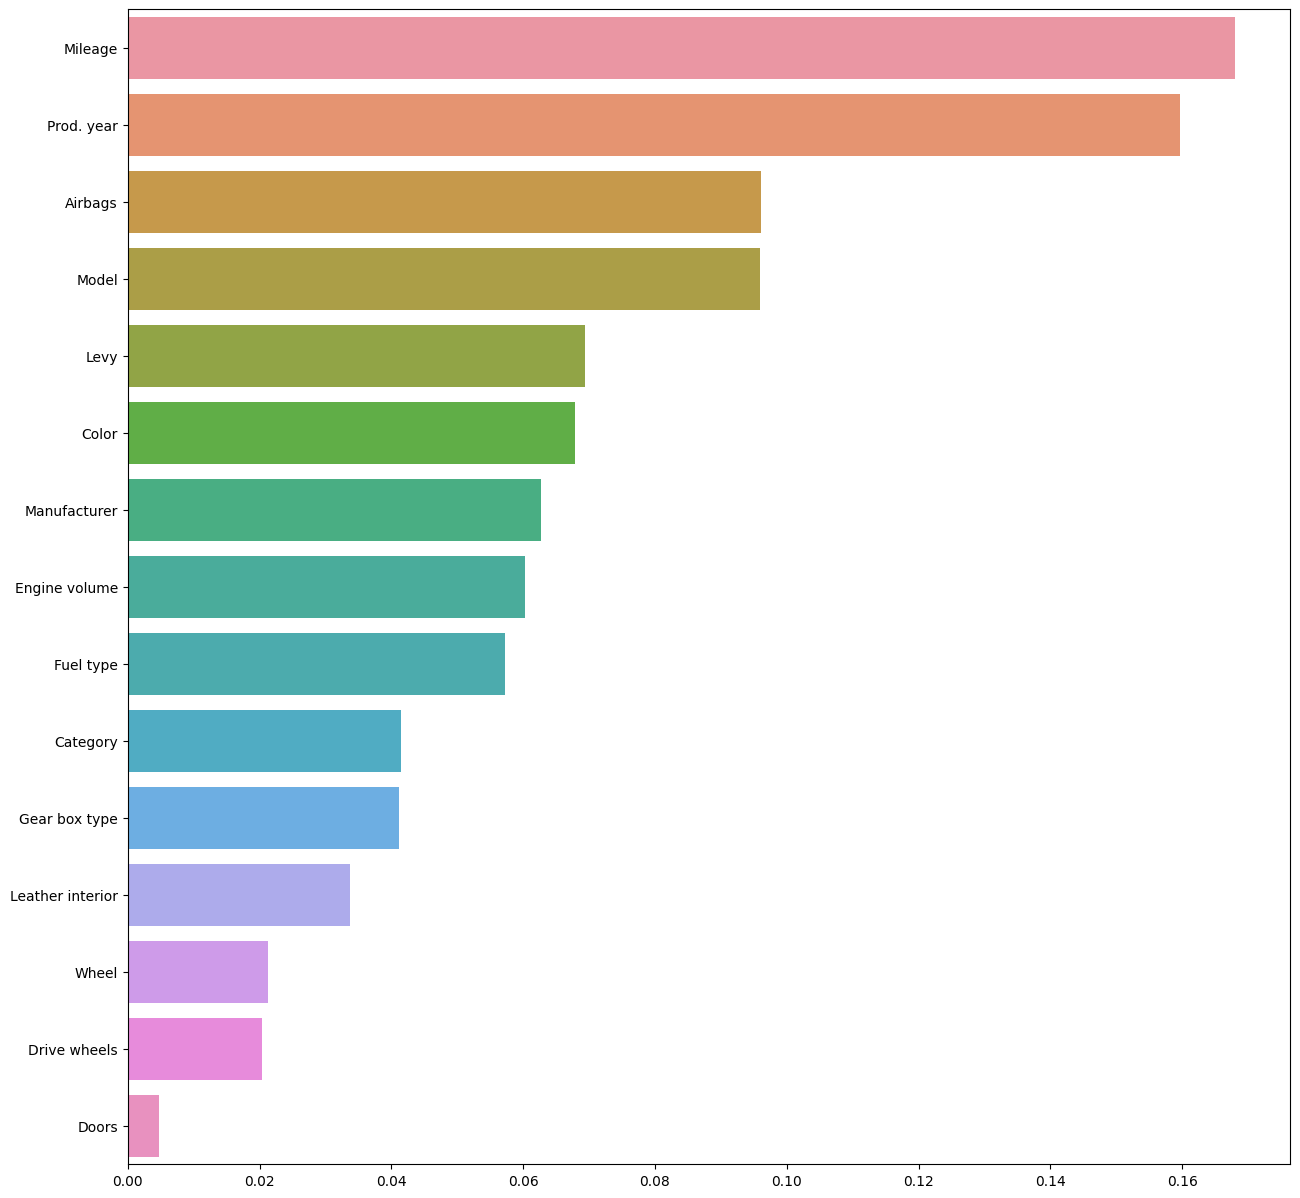

In [375]:
feature_imp = pd.Series(RandomF.feature_importances_,index = [x for x in df.columns if x != 'Price']).sort_values(ascending=False)

# Creating a bar plot
plt.figure(figsize=(15,15))
sns.barplot(x=feature_imp,y=feature_imp.index)

# SVM Model ⛔

In [376]:
c_val = 100 
gmm = 0.1
d = 2

In [377]:
svc_rbf = SVC(kernel='rbf', C=c_val, gamma=gmm)
svc_poly = SVC(kernel='poly', C=c_val, degree=d)

In [378]:
# svc_rbf_pred = svc_rbf.fit(x_train, y_train)
# svc_poly = svc_poly.fit(x_train, y_train)

In [379]:
# svc_rbf_pred = svc_rbf.predict(x_test)
# svc_poly_pred = svc_poly.predict(x_test)

In [380]:
# print('----- Confusion matrix of SVC Rbf -----')
# print(confusion_matrix(y_test,svc_rbf_pred))
# print('----- Confusion matrix of SVC Poly -----')
# print(confusion_matrix(y_test,svc_poly_pred))

In [381]:
# print('----- Classification matrix of SVC Rbf -----')
# print(classification_report(y_test,svc_rbf_pred))
# print('----- Classification matrix of SVC Poly -----')
# print(classification_report(y_test,svc_poly_pred))

# GridSearch Classification

In [382]:
classification = {'KNN':KNeighborsClassifier(),'DT':DecisionTreeClassifier(),'RF':RandomForestClassifier()}

In [383]:
#Create Parameter Dicitonary for KNN
K_list = [1,3,5,7,9,11,13,15,17,19,21,23,35,45]
KNN_param = dict(n_neighbors = K_list)
KNN_param

{'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 35, 45]}

In [384]:

#Create Parameter Dictionary for Decision Tree
ASM_function = ['entropy','gini']
maxD = [4,5,6,None]
maxF =['auto','log2',None]
minSample = [1,2,4]
DT_param = dict(criterion = ASM_function,max_depth = maxD,min_samples_leaf = minSample,max_features = maxF)

In [385]:
#Create Parameter Dictionary for Random Forest
nEst = [10,30,50,100]
RF_param = dict(n_estimators = nEst,criterion = ASM_function,max_depth = maxD,min_samples_leaf= minSample,max_features = maxF)

In [386]:
for EST in classification:
    model = classification[EST]
    if EST == 'KNN':
        param = KNN_param
    elif EST == 'DT':
        param = DT_param
    else:
        param = RF_param
    grid = GridSearchCV(estimator = model,
                        n_jobs=8,
                        verbose=10,
                        scoring='accuracy',
                        cv=5,
                        param_grid=param)
    grid_result = grid.fit(x_train,y_train)

Fitting 5 folds for each of 14 candidates, totalling 70 fits


c:\Users\justo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 288 candidates, totalling 1440 fits


c:\Users\justo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_search.py:910: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

c:\Users\justo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.



In [387]:
# Show Best Parameters 
print('Best params: ',grid_result.best_params_)
print('Best score: ', grid_result.best_score_)

Best params:  {'criterion': 'entropy', 'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 2, 'n_estimators': 100}
Best score:  0.6525396825396825


In [388]:
# RandomF1 = RandomForestClassifier(n_estimators = 50,criterion = 'entropy',max_depth = None,min_samples_leaf= 2,max_features = 'log2')
# RandomF1.fit(x_train,y_train)

In [389]:
# #Model Testing
# y_predRF = RandomF1.predict(x_test)
# RFScore = accuracy_score(y_test,y_predRF)
# RFScore

In [390]:
# #print confusion matrix and classification report for best k
# print('Confusion Matrix: ')
# print(confusion_matrix(y_test,y_predRF))
# print('Classification Report: ')
# print(classification_report(y_test,y_predRF))